**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


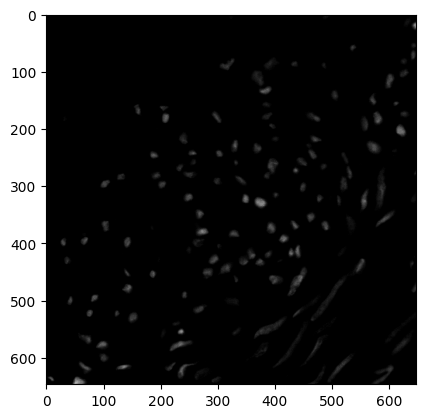

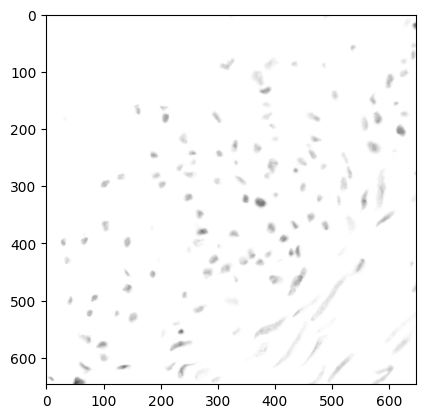

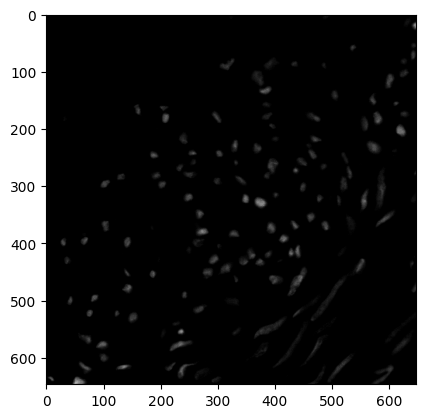

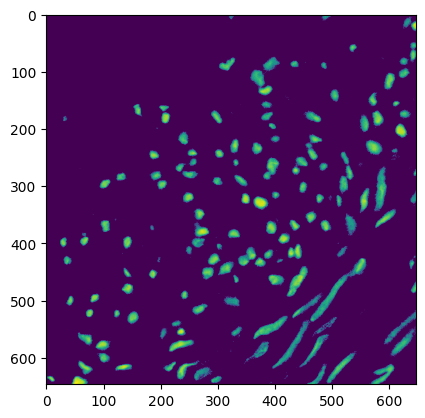

In [17]:
# code here
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def read_image(filename):
  img = cv2.imread(filename, 1)
  return img

def read_grayscale(filename):
  img = cv2.imread(filename, 0)
  return img

def negative_image(img):
  height, width, _ = img.shape

  for x in range(height):
    for y in range(width):
      pixel = img[x][y]
      pixel[0] = 255 - pixel[0]
      pixel[1] = 255 - pixel[1]
      pixel[2] = 255 - pixel[2]

  return img

image = read_image('./im_cells.png')
plt.imshow(image)
plt.show(block=False)
plt.close()

negative_img = read_image('./im_cells.png')
negative = negative_image(negative_img)
plt.imshow(negative)
plt.show(block=False)
plt.close()

positive_img = negative_image(negative)
plt.imshow(positive_img)
plt.show(block=False)
plt.close()

image = read_grayscale('./im_cells.png')
image = np.log1p(image)
plt.imshow(image)
plt.show(block=False)
plt.close()

## Em ambas as imagens os objetos podem ser distinguidos com facilidade, nesse caso alternar a imagem para negativa não melhora a contagem

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



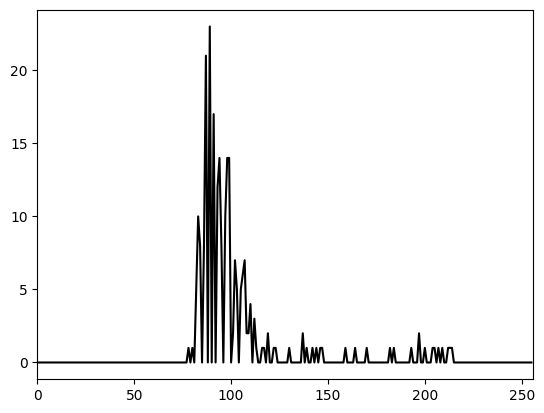

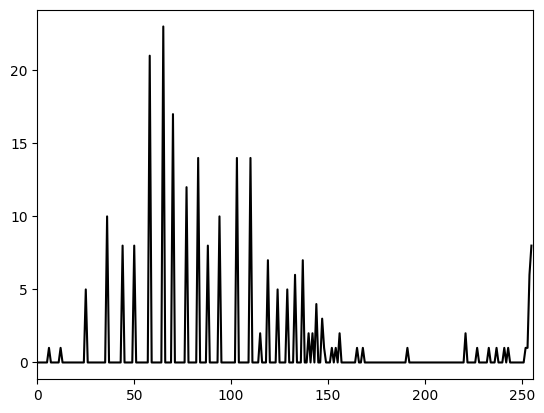

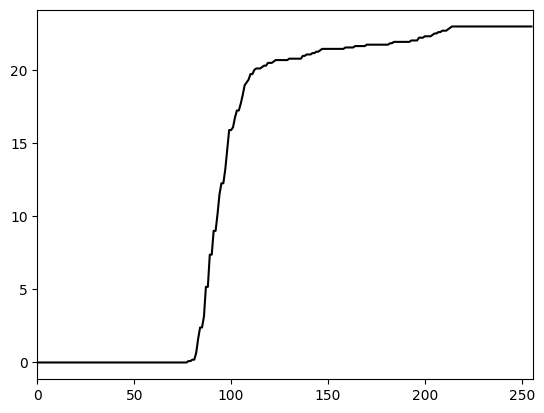

In [22]:
# code here
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def read_image(filename):
  img = cv2.imread(filename, 0)
  return img

image = read_image('./pout.tif')
hist = cv2.calcHist(image, [0], None, [256], [0, 256])
plt.plot(hist, color='k')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()

eq = cv2.equalizeHist(image) 
eq_hist = cv2.calcHist(eq, [0], None, [256], [0, 256])
plt.plot(eq_hist, color='k')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()


cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()/cdf.max())
plt.plot(cdf_normalized, color='k')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

In [15]:
# code here